# INFO 103: Introduction to data science <br> Demo \# 6: EDA <br> Author: JRW

In [2]:
import json
import numpy as np
import re
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import datetime
% matplotlib inline

### Mission
This workbook presents an example of an early-stage analysis for a data science project. Exploratory data analysis (EDA) is an important first step when encountering a new data set, with specific attention to data consistency evaluation, description, and hypothesis generation. Since this workbook starts with a professionally-curated data set it will primarily focus on the latter two directions. However, it is not an uncommon outcome for EDA to result in a return to pre-processing and data collection.

#### Yelp! Dataset Challenge
In this workbook we'll be using a portion of the current (9th round) Yelp! academic data set. Every year, Yelp! releases a sample of their data in an academic challenge, where teams of students are encouraged to develop novel work, submitted for awards and prizes. This series of academic challenges has led to hundreds of academic papers and resulted in the awards that total over $50,000. More information on the present round (submissions due June 30th) can be found here:

* https://www.yelp.com/dataset_challenge

#### Data
This year's data set includes 4.1 million reviews and 947 thousand tips by 1 million users for 144 thousand businesses. This is a highly-varietal data set with 1.1 million business attributes, including business hours, parking availability, and social ambience. Additionally, this years data set includes over 200,000 user images depiction aspects of the covered businesses.

To get the data, please visit the following page:

* https://www.yelp.com/html/pdf/Dataset_Challenge_Academic_Dataset_Agreement.pdf

#### What are we looking at here?
It would be difficult to cover all aspects of the data set, which comes in several json files (linked tables). For sake of size and simplicity we'll focus only on the user-level data, which excludes the actual business reviews and images. With the user-level data, our immediate interest will focus on developing hypotheses to answer the question: what user features correspond to high levels of social connectivity? A result of this investigation might help me to figure out how to make friends on a social network!

#### Let's start by looking at one user
What different features are present for each user in this table? What do the different fields mean? Is there a data dictionary?

In [3]:
with open("yelp_dataset_challenge_round9/yelp_academic_dataset_user.json", "r") as f:
    for line in f:
        user = json.loads(line)
        break

In [4]:
user

{u'average_stars': 3.59,
 u'compliment_cool': 4192,
 u'compliment_cute': 79,
 u'compliment_funny': 4192,
 u'compliment_hot': 3904,
 u'compliment_list': 19,
 u'compliment_more': 305,
 u'compliment_note': 4705,
 u'compliment_photos': 1347,
 u'compliment_plain': 2617,
 u'compliment_profile': 207,
 u'compliment_writer': 1147,
 u'cool': 17579,
 u'elite': [u'2017', u'2015', u'2016', u'2014', u'2011', u'2013', u'2012'],
 u'fans': 298,
 u'friends': [u'iJg9ekPzF9lkMuvjKYX6uA',
  u'ctWAuzS04Xu0lke2Rop4lQ',
  u'B8CqppjOne8X4RSJ5KYOvQ',
  u'_K9sKlA4fVkWI4hyGSpoPA',
  u'Ec-epOsAWvjI6e90IlM8jw',
  u'r2UUCzGxqI6WPsiWPgqG2A',
  u'3ybkL7N63UdSn4wepINzUw',
  u'd-lzusSagnkDuiyLlfF5pw',
  u'Ydh2zA5wUlD-UbApp8toGA',
  u'DeZhnC-RsNFmKSlI0lUksw',
  u'NTuvVb-ZwQ_rFn6W9Krm7A',
  u'PCdUS3L8LhQOereIyQ6_RA',
  u'RYIhfaNekKLDuqmwqkVi3g',
  u'i-mQUeJVKqXscelJ7XjT2w',
  u'5T_2RWFzvf-nMZYD0RsvWg',
  u'DTo6vHKzyx8RmMrVbTgowg',
  u'kOUzW4porPxN0n54Z0eHMQ',
  u'x-lu6ZBVTjyHFvoq3f0K4w',
  u'8Gy1MJ4gCnOL8qiwD2ZGLQ',
  u'8

#### That's a lot of info about one user
The 'friends' field is a whole list of other users, so let's just take some numeric quantities for now, reducing 'friends' to just the number of friends.

In [5]:
print("name: ", user["name"])
print("id: ", user["user_id"])
print("average stars in rating: ", user["average_stars"])
print("number of friends: ", len(user["friends"]))
print("reviews written: ", user['review_count'])
print("on Yelp since: ", user['yelping_since'])

('name: ', u'Rob')
('id: ', u'EZmocAborM6z66rTzeZxzQ')
('average stars in rating: ', 3.59)
('number of friends: ', 2313)
('reviews written: ', 761)
('on Yelp since: ', u'2009-09-12')


#### To make some generalizations, we need to get this data for all of the users
For our focus, I have simplified the data set to only record friend counts, instead of the full lists of friends. This removes the network structure, but preserves some key information on popularity. 

In [6]:
users = []
with open("yelp_dataset_challenge_round9/yelp_academic_dataset_user.json", "r") as f:
    for line in f:
        user = json.loads(line)
        user["friends"] = len(user["friends"])
        user["elite"] = len(user["elite"])
        users.append(user)

#### Now let's sort our data to see how the least/most popular rate
What's special about the most popular people?
What's different about the least populat people?

In [7]:
users = sorted(users, key=lambda x: x["friends"], reverse=True)

In [8]:
users[0:2]

[{u'average_stars': 3.91,
  u'compliment_cool': 463,
  u'compliment_cute': 56,
  u'compliment_funny': 463,
  u'compliment_hot': 250,
  u'compliment_list': 17,
  u'compliment_more': 65,
  u'compliment_note': 231,
  u'compliment_photos': 173,
  u'compliment_plain': 842,
  u'compliment_profile': 55,
  u'compliment_writer': 237,
  u'cool': 3934,
  u'elite': 1,
  u'fans': 241,
  u'friends': 14995,
  u'funny': 1233,
  u'name': u'Walker',
  u'review_count': 462,
  u'type': u'user',
  u'useful': 12332,
  u'user_id': u'qVc8ODYU5SZjKXVBgXdI7w',
  u'yelping_since': u'2007-01-25'},
 {u'average_stars': 3.92,
  u'compliment_cool': 4878,
  u'compliment_cute': 336,
  u'compliment_funny': 4878,
  u'compliment_hot': 2544,
  u'compliment_list': 117,
  u'compliment_more': 260,
  u'compliment_note': 2217,
  u'compliment_photos': 550,
  u'compliment_plain': 8247,
  u'compliment_profile': 268,
  u'compliment_writer': 1304,
  u'cool': 71634,
  u'elite': 10,
  u'fans': 1910,
  u'friends': 12085,
  u'funny': 12

In [9]:
users[-3:-1]

[{u'average_stars': 2.0,
  u'compliment_cool': 0,
  u'compliment_cute': 0,
  u'compliment_funny': 0,
  u'compliment_hot': 0,
  u'compliment_list': 0,
  u'compliment_more': 0,
  u'compliment_note': 0,
  u'compliment_photos': 0,
  u'compliment_plain': 0,
  u'compliment_profile': 0,
  u'compliment_writer': 0,
  u'cool': 0,
  u'elite': 1,
  u'fans': 0,
  u'friends': 1,
  u'funny': 0,
  u'name': u'Hannah',
  u'review_count': 1,
  u'type': u'user',
  u'useful': 0,
  u'user_id': u's1l_dY8eGvwMqQNvQXeqNg',
  u'yelping_since': u'2015-11-11'},
 {u'average_stars': 5.0,
  u'compliment_cool': 0,
  u'compliment_cute': 0,
  u'compliment_funny': 0,
  u'compliment_hot': 0,
  u'compliment_list': 0,
  u'compliment_more': 0,
  u'compliment_note': 0,
  u'compliment_photos': 0,
  u'compliment_plain': 0,
  u'compliment_profile': 0,
  u'compliment_writer': 0,
  u'cool': 0,
  u'elite': 1,
  u'fans': 0,
  u'friends': 1,
  u'funny': 0,
  u'name': u'Angel',
  u'review_count': 1,
  u'type': u'user',
  u'useful': 0

#### First guess: angry reviewers don't make many friends
Here, let's see if we can answer the question "do you catch more flies with honey or vinegar?" To do this, we'll check to see if giving more stars gets you more friends.

#### Let's look at some descriptive statistics for the stars

In [10]:
mu = np.mean([user["average_stars"] for user in users])
sigma = np.std([user["average_stars"] for user in users])
print("average stars average: ", mu, "; average stars standard deviation: ", sigma)

('average stars average: ', 3.7091466847737387, '; average stars standard deviation: ', 1.0971766107104963)


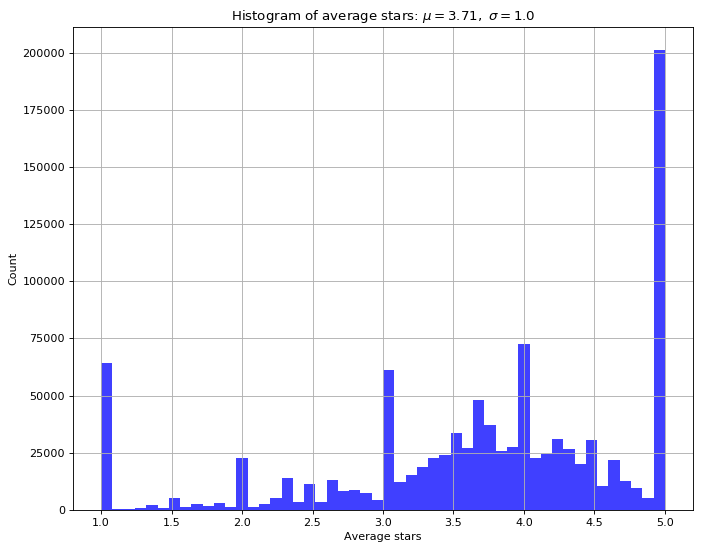

In [12]:
# let's make the figure big
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

# the histogram of the data
n, bins, patches = plt.hist([user["average_stars"] for user in users], 50, facecolor='blue', alpha=0.75)

plt.xlabel('Average stars')
plt.ylabel('Count')
plt.title(r'Histogram of average stars: $\mu='+str(round(mu, 2))+',\ \sigma='+str(round(sigma))+'$')
plt.grid(True)

#### Now let's do the same for the friend counts

In [13]:
mu = np.mean([user["friends"] for user in users])
sigma = np.std([user["friends"] for user in users])
print("average number of friends: ", mu, "; friends standard deviation: ", sigma)

('average number of friends: ', 28.873443802018979, '; friends standard deviation: ', 119.36846062697343)


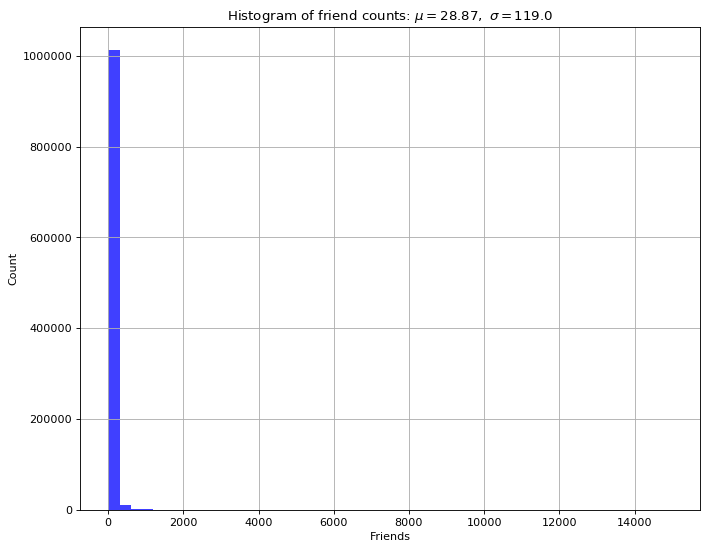

In [14]:
# let's make the figure big
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

# the histogram of the data
n, bins, patches = plt.hist([user["friends"] for user in users], 50, facecolor='blue', alpha=0.75)

plt.xlabel('Friends')
plt.ylabel('Count')
plt.title(r'Histogram of friend counts: $\mu='+str(round(mu, 2))+',\ \sigma='+str(round(sigma))+'$')
plt.grid(True)

#### Where did the data go? 
This is a heavy-tailed distribution with "extreme variation." Most people (over 1 million) have no friends at all, but someone has almost 15,000 friends!

In [15]:
print("least friends: ", min([user["friends"] for user in users]), "; most friends: ", max([user["friends"] for user in users]))

('least friends: ', 1, '; most friends: ', 14995)


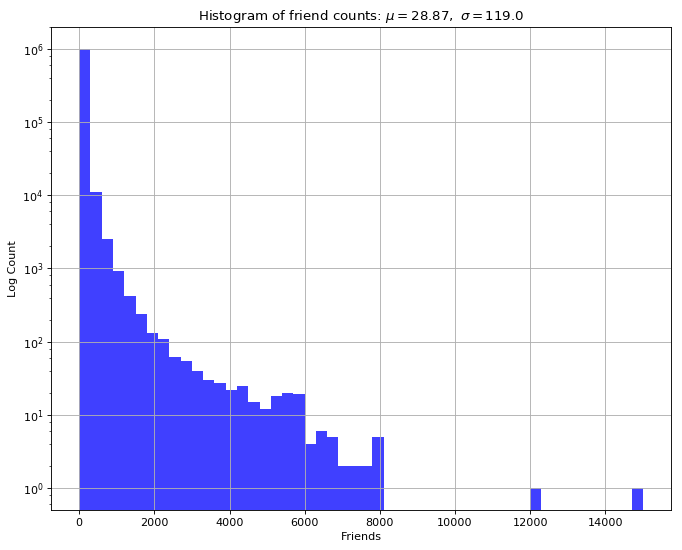

In [24]:
# let's make the figure big
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

# the histogram of the data
n, bins, patches = plt.hist([user["friends"] for user in users], 50, log="true", facecolor='blue', alpha=0.75)

plt.xlabel('Friends')
plt.ylabel('Log Count')
plt.title(r'Histogram of friend counts: $\mu='+str(round(mu, 2))+',\ \sigma='+str(round(sigma))+'$')
plt.grid(True)

#### So, let's compare the numbers of stars vs. the numbers of friends

In [21]:
print("correlation coefficient: ", np.corrcoef([user["average_stars"] for user in users], [user["friends"] for user in users])[0][1])

('correlation coefficient: ', 0.03518358510973623)


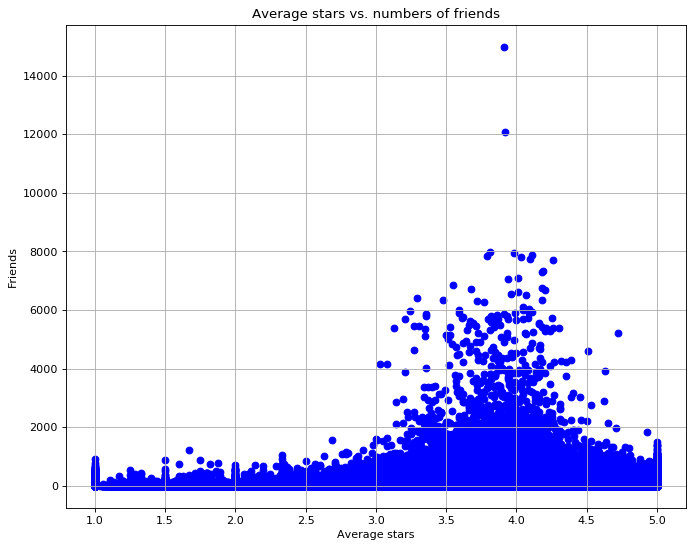

In [22]:
# let's make the figure big
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

# the scatter plot
plt.scatter([user["average_stars"] for user in users], [user["friends"] for user in users], color='blue')

plt.xlabel('Average stars')
plt.ylabel('Friends')
plt.title('Average stars vs. numbers of friends')
plt.grid(True)

#### Side note: what's wrong with our scatter plot?
Scatter plots are great basic representations of two data dimensions simultaneously. They can help a researcher judge "by eye" if two features are related, but when the number of data points get large, information on density is easily lost. To represent density, we need a thrid dimension, which generally comes in the form of color. This can mean coloring points according to their local densities, or creating 2-dimensional bins and using color instead of bar heights in a kind of histogram, sometimes referred to as a "heat map". We'll go with the latter and hexagonal bins. What further information do we get out of this representation? Also, why have I logged the color scale?

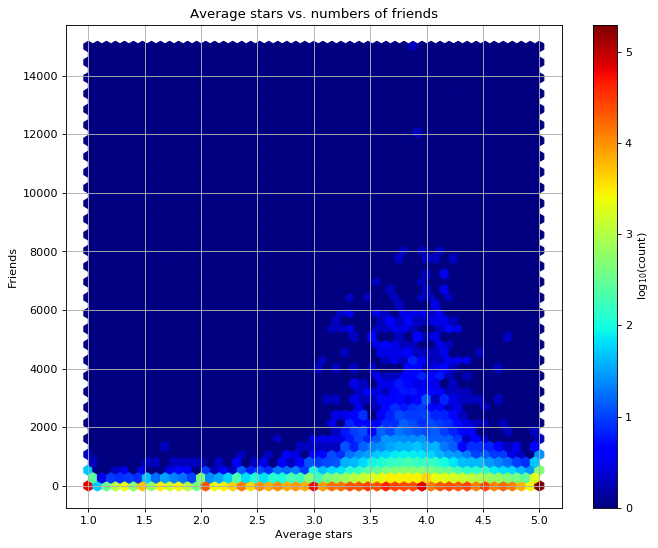

In [36]:
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

# the histogram of the data
hb = plt.hexbin(
    [user["average_stars"] for user in users], [user["friends"] for user in users], 
    gridsize=50, cmap='jet', bins = 'log'
)

cb = fig.colorbar(hb)
cb.set_label('$\log_{10}($count$)$')

plt.xlabel('Average stars')
plt.ylabel('Friends')
plt.title('Average stars vs. numbers of friends')
plt.grid(True)

#### Anyway, that didn't work out!
If we were right, we would have seen a large correlation and friend counts going up (or down) with the average. This doesn't happen! If definitely takes time to make lots of friends, so maybe it's just how long you've been around that matter? But how do we turn dates into durations?

In [22]:
print("right now we have: ", users[0]['yelping_since'])

('right now we have: ', u'2007-01-25')


So, we have to turn these strings into a datetime objects:

In [23]:
t = datetime.datetime.strptime(users[0]['yelping_since'], "%Y-%M-%d")
print(t)

2007-01-25 00:01:00


and then measure against the present:

In [24]:
print("days on Yelp!: ", (datetime.datetime.now() - t).days)

('days on Yelp!: ', 3767)


but really we have to do this for all of the users:

In [25]:
for user in users:
    user['yelpDays'] = (datetime.datetime.now() - datetime.datetime.strptime(user['yelping_since'], "%Y-%M-%d")).days

#### Let's see how predictive the days on Yelp feature is!

In [26]:
mu = np.mean([user["yelpDays"] for user in users])
sigma = np.std([user["yelpDays"] for user in users])
print("average number of days on Yelp!: ", mu, "; Yelp! days standard deviation: ", sigma)

('average number of days on Yelp!: ', 1741.7652608428725, '; Yelp! days standard deviation: ', 842.37791163097893)


Notice there is a very different behavior going on here...

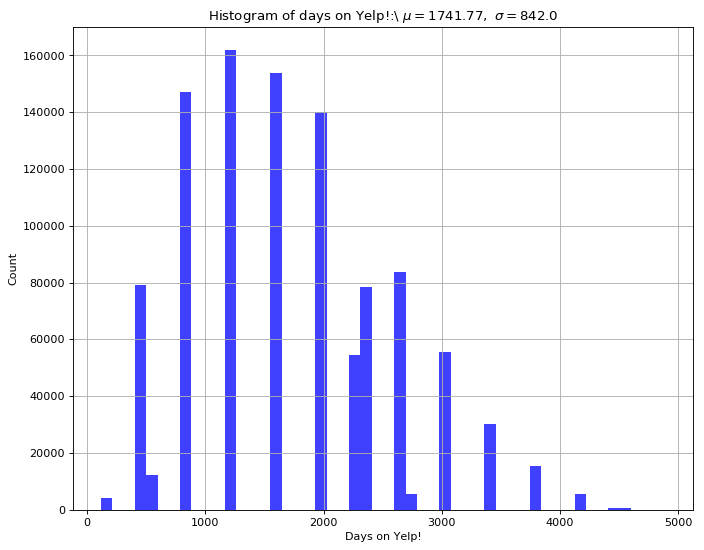

In [27]:
# let's make the figure big
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

# the histogram of the data
n, bins, patches = plt.hist([user["yelpDays"] for user in users], 50, log=False, facecolor='blue', alpha=0.75)

plt.xlabel('Days on Yelp!')
plt.ylabel('Count')
plt.title(r'Histogram of days on Yelp!:\ $\mu='+str(round(mu, 2))+',\ \sigma='+str(round(sigma))+'$')
plt.grid(True)

In [28]:
print("correlation coefficient: ", np.corrcoef([user["yelpDays"] for user in users], [user["friends"] for user in users])[0][1])

('correlation coefficient: ', 0.14534953157265731)


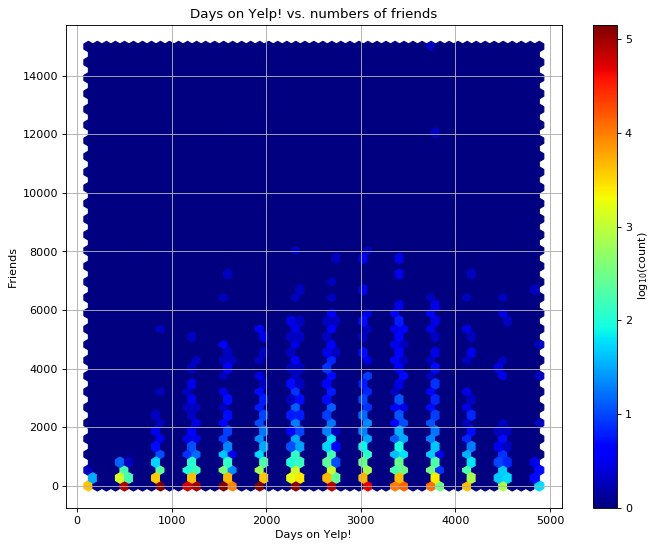

In [35]:
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

# the histogram of the data
hb = plt.hexbin(
    [user["yelpDays"] for user in users], [user["friends"] for user in users], 
    gridsize=50, cmap='jet', bins = 'log'
)

cb = fig.colorbar(hb)
cb.set_label('$\log_{10}($count$)$')

plt.xlabel('Days on Yelp!')
plt.ylabel('Friends')
plt.title('Days on Yelp! vs. numbers of friends')
plt.grid(True)

#### What happened?
Well, the correlation went up a little, so it does help somewhat to have been on Yelp! for longer to gain more friends. However, there are still lots of people who have been on Yelp! for less time who are mkaing friends fast. 

We also discovered something very strange. Notice how the days on Yelp! come in strips? This must have to do with Yelp's sampling of the data! Probably, because they can't give you all of their data, they want to make sure there is a sufficient number of users who have been on for different periods that can be studied. If they instead did a complete random sample,  we would have incomplete records on users, and about mostly only about the people in the middle who adopted Yelp! about 3,000 days (4&ndash;5ish years) ago, i.e., none of the newcomers or early adopters!

#### So, maybe it's about total activity, i.e., review counts

In [30]:
mu = np.mean([user["review_count"] for user in users])
sigma = np.std([user["review_count"] for user in users])
print("average number of reviews: ", mu, "; reviews standard deviation: ", sigma)

('average number of reviews: ', 24.31933240855151, '; reviews standard deviation: ', 82.066009057406362)


It looks like review counts are heavy tailed, too! This is like our friend counts!

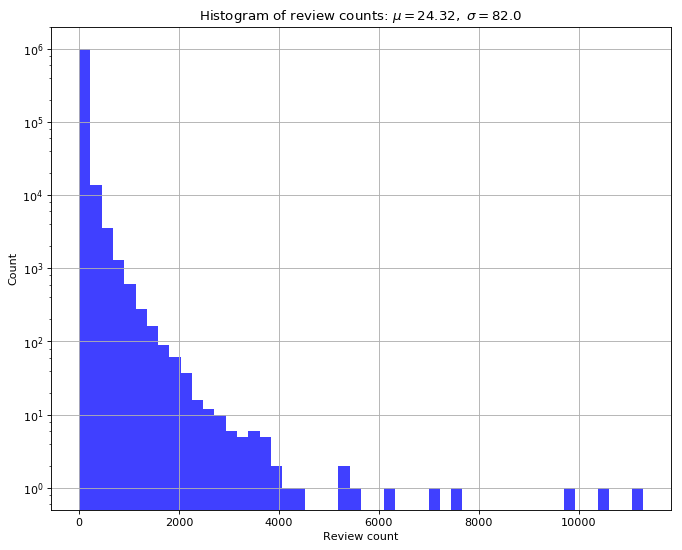

In [31]:
# let's make the figure big
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

# the histogram of the data
n, bins, patches = plt.hist([user["review_count"] for user in users], 50, log=True, facecolor='blue', alpha=0.75)

plt.xlabel('Review count')
plt.ylabel('Count')
plt.title(r'Histogram of review counts: $\mu='+str(round(mu, 2))+',\ \sigma='+str(round(sigma))+'$')
plt.grid(True)

Let's compare the review counts against the friends counts

In [32]:
print("correlation coefficient: ", np.corrcoef([user["review_count"] for user in users], [user["friends"] for user in users])[0][1])

('correlation coefficient: ', 0.51906872918784452)


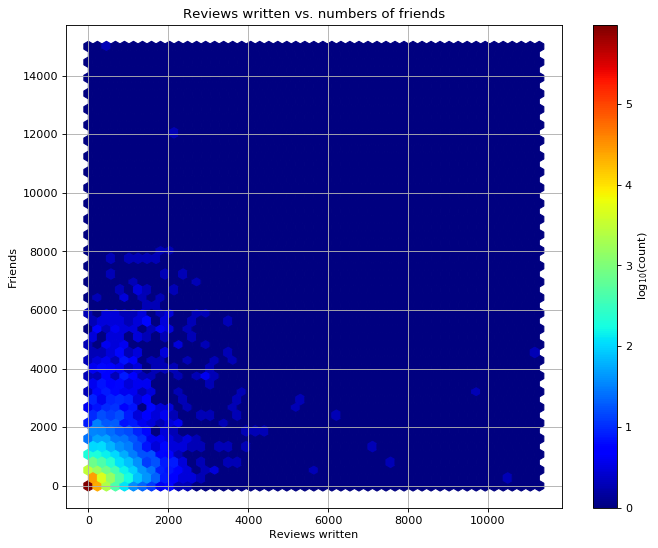

In [34]:
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

# the histogram of the data
hb = plt.hexbin(
    [user["review_count"] for user in users], [user["friends"] for user in users], 
    gridsize=50, cmap='jet', bins = 'log'
)

cb = fig.colorbar(hb)
cb.set_label('$\log_{10}($count$)$')

plt.xlabel('Reviews written')
plt.ylabel('Friends')
plt.title('Reviews written vs. numbers of friends')
plt.grid(True)

#### Better, but there's still something missing!
So, our correlation went up to more than 0.5, which means there's something going on. It definitely helps to be more active on Yelp!, but that can't be all there is to it! To make friends, it must take quality, funny, or helpful reviews, etc., but what really matters? Let's do some exploration on two corners of the scatterplot, above. Let's compare (1) those who write some reviews but have lots of friends (top left corner) to (2) those who write lots of reviews but still don't seem to get as many friends (bottom right).

In [37]:
friendmakers = [
    user for user in users 
    if user['friends'] >= 4000 and user["review_count"] < 2000
]
overwriters = [
    user for user in users 
    if user['friends'] < 4000 and user["review_count"] >= 2000
]

Let's look at the averages across each feature between the two groups and divide by the numbers of reviews

In [38]:
for key in friendmakers[0].keys():
    try:
        float(friendmakers[0][key])
        print key, np.mean([user[key]/float(user["review_count"]) for user in friendmakers])
    except ValueError:
        pass

useful 28.4755166608
compliment_photos 0.804521901945
compliment_list 0.0385258595756
compliment_funny 2.62393997254
funny 10.7826149885
review_count 1.0
friends 15.4229148785
fans 0.578968371423
yelpDays 7.83383873764
compliment_note 1.03218708293
compliment_plain 3.11678237111
compliment_writer 0.716012907891
compliment_cute 0.124742368758
average_stars 0.0106419099056
compliment_more 0.177822120459
elite 0.00872970274348
compliment_hot 1.64906151249
cool 27.223925015
compliment_profile 0.126177810054
compliment_cool 2.62393997254


In [39]:
for key in overwriters[0].keys():
    try:
        float(overwriters[0][key])
        print(key, np.mean([user[key]/float(user["review_count"]) for user in overwriters]))
    except ValueError:
        pass

(u'useful', 3.6938149551662005)
(u'compliment_photos', 0.21070054854673284)
(u'compliment_list', 0.033365757795208992)
(u'compliment_funny', 0.66270141421001161)
(u'funny', 1.9567131730574878)
(u'review_count', 1.0)
(u'friends', 0.49022570959133649)
(u'fans', 0.096590387790007684)
('yelpDays', 1.2892915470285293)
(u'compliment_note', 0.25769638853503896)
(u'compliment_plain', 0.6308639721572612)
(u'compliment_writer', 0.23780458486596948)
(u'compliment_cute', 0.045570359575620376)
(u'average_stars', 0.0014118486085456976)
(u'compliment_more', 0.068191664860097242)
(u'elite', 0.0028595487946126829)
(u'compliment_hot', 0.56525114978835689)
(u'cool', 3.2346652952357653)
(u'compliment_profile', 0.085153844581731364)
(u'compliment_cool', 0.66270141421001161)


#### Comparing the two

In [150]:
for key in overwriters[0].keys():
    try:
        float(overwriters[0][key])
        print(key)
        print(
            "friend makers: ", 
            np.mean([user[key] for user in friendmakers]), 
            np.mean([user[key]/float(user["review_count"]) for user in friendmakers])
        )
        print(
            "over writers: ", 
            np.mean([user[key] for user in overwriters]), 
            np.mean([user[key]/float(user["review_count"]) for user in overwriters])
        )
        print("")
    except ValueError:
        pass

useful
friend makers:  12433.9112903 28.4755166608
over writers:  8983.40206186 3.69381495517

compliment_photos
friend makers:  701.387096774 0.804521901945
over writers:  511.649484536 0.210700548547

compliment_list
friend makers:  39.4032258065 0.0385258595756
over writers:  78.9587628866 0.0333657577952

compliment_funny
friend makers:  1790.08064516 2.62393997254
over writers:  1626.91752577 0.66270141421

funny
friend makers:  6154.17741935 10.7826149885
over writers:  4756.78350515 1.95671317306

review_count
friend makers:  946.862903226 1.0
over writers:  2940.84536082 1.0

friends
friend makers:  5417.95967742 15.4229148785
over writers:  1378.08247423 0.490225709591

fans
friend makers:  491.217741935 0.578968371423
over writers:  268.628865979 0.09659038779

yelpDays
friend makers:  2847.39516129 7.55752115439
over writers:  3231.84536082 1.25255026827

compliment_note
friend makers:  770.459677419 1.03218708293
over writers:  642.134020619 0.257696388535

compliment_plain

#### Useful, funny, and cool compliments, per review written
So, it not really all about how much you write, but also about how appealing your writing is! Let's see how well these content quality metrics associate to the number of friends!

In [46]:
print("correlation coefficient: ", np.corrcoef([user["useful"] for user in users], [user["friends"] for user in users])[0][1])

('correlation coefficient: ', 0.38468740837185583)


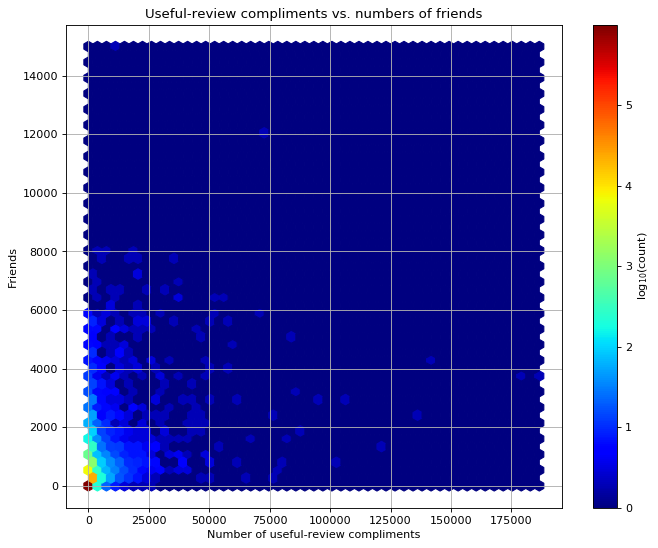

In [47]:
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

# the histogram of the data
hb = plt.hexbin(
    [user["useful"] for user in users], [user["friends"] for user in users], 
    gridsize=50, cmap='jet', bins = 'log'
)

cb = fig.colorbar(hb)
cb.set_label('$\log_{10}($count$)$')

plt.xlabel('Number of useful-review compliments')
plt.ylabel('Friends')
plt.title('Useful-review compliments vs. numbers of friends')
plt.grid(True)

In [48]:
print("correlation coefficient: ", np.corrcoef([user["funny"] for user in users], [user["friends"] for user in users])[0][1])

('correlation coefficient: ', 0.31092538293864969)


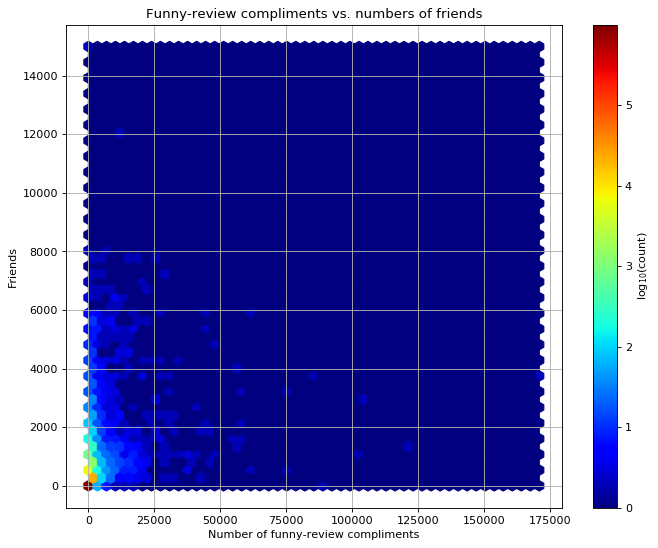

In [49]:
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

# the histogram of the data
hb = plt.hexbin(
    [user["funny"] for user in users], [user["friends"] for user in users], 
    gridsize=50, cmap='jet', bins = 'log'
)

cb = fig.colorbar(hb)
cb.set_label('$\log_{10}($count$)$')

plt.xlabel('Number of funny-review compliments')
plt.ylabel('Friends')
plt.title('Funny-review compliments vs. numbers of friends')
plt.grid(True)

In [50]:
print("correlation coefficient: ", np.corrcoef([user["cool"] for user in users], [user["friends"] for user in users])[0][1])

('correlation coefficient: ', 0.35198075001696394)


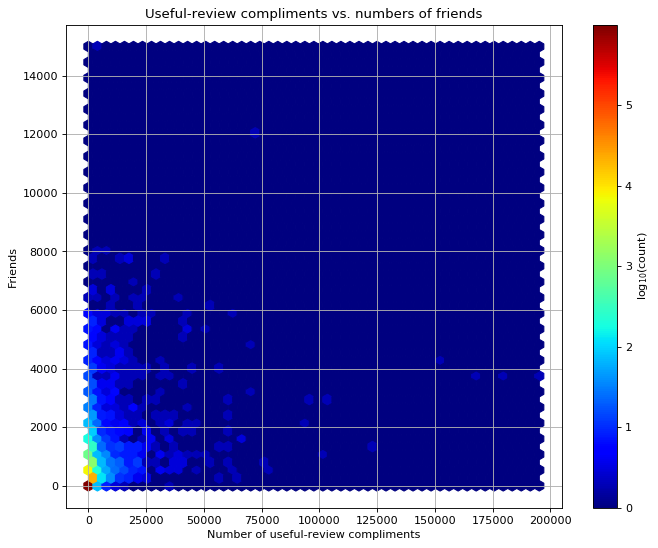

In [51]:
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

# the histogram of the data
hb = plt.hexbin(
    [user["cool"] for user in users], [user["friends"] for user in users], 
    gridsize=50, cmap='jet', bins = 'log'
)

cb = fig.colorbar(hb)
cb.set_label('$\log_{10}($count$)$')

plt.xlabel('Number of useful-review compliments')
plt.ylabel('Friends')
plt.title('Useful-review compliments vs. numbers of friends')
plt.grid(True)

#### What did we learn?
* Yelp! sampled the data by user year of adoption,
* friend makers work harder at interacting with other people (potential friends),
* i.e., they upvote other users' reviews more frequently with 'more,' 'cool,' 'userful'
* friend makers are better at getting review-based compliments, cool, funny, hot, etc.
* friend makers do give higher stars, on average!
* over writers get more compliments for the 'profile,' 'list,' and 'more' categories,
* but 'more' means people want them to write more (not reviews, details),
* and 'profiles' and 'lists' don't have anything to do with writing reviews, which is what yelp is about!
* However, beyond any quality measure, shear activity levels seem to be the most important, 
* so above all else, participate!

So, in summary, it appears that review contents and community activities have the most to do with making friends. This is not surprising&mdash;in a social environment, you make friends by being social and supporting the community! This is really the same as on all other social media! Specifically, if you want to be 'good' at social media don't just tweet your mundane everyday activities (like an over writer), put some thought/humor/life into the posts to appeal to other people. Also, it takes friends to make friends&mdash;your have to engage others with upvotes, etc., to get them to view your reviews and upvote you!

#### How can we learn more?
So far we have only looked at the individual user statistics. This has lead to some hypotheses about what gets people friends on Yelp!, but in order to test some of those hypotheses we would need to run other experiments, and most likely get other data. Specifically, if we think good/helpful/funny/hot reviews are the key to making friends, we need to do some text analysis on the unstructured review text.